In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

data = pd.read_csv(r'Global YouTube Statistics.csv', encoding='latin-1')
#Разделяем числовые и категориальные (не числовые) данные
categorial_features = [feature for feature in data.columns if data[feature].dtype=='object']
numerical_features = [feature for feature in data.columns if feature not in categorial_features]
data_num = data[numerical_features]
data_cat = data[categorial_features]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

Text(0.5, 1.0, 'Топ 10 каналов по количеству просмотров')

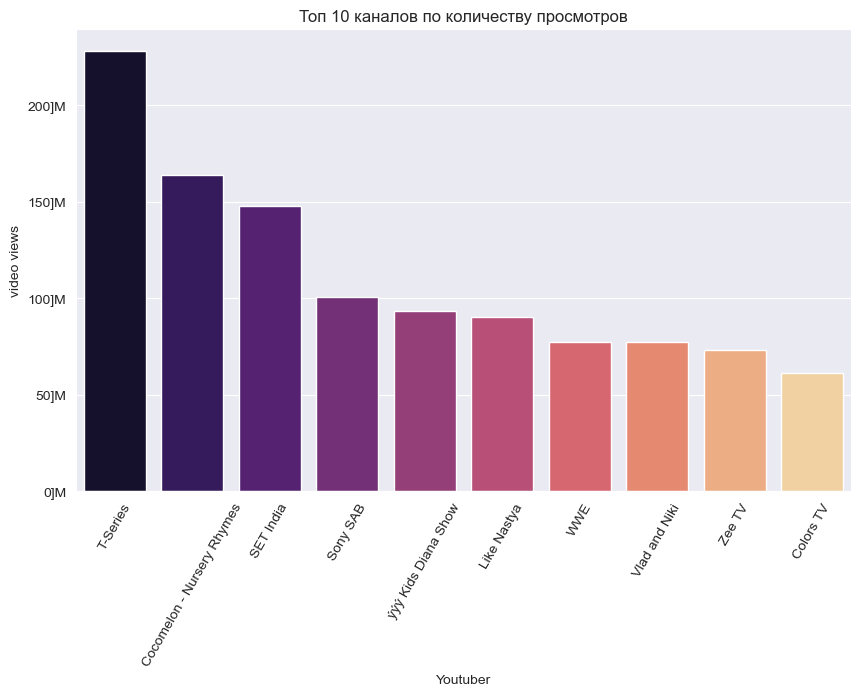

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax=sns.barplot(y='video views',x='Youtuber',data=data,order=data.sort_values('video views',ascending=False).Youtuber.iloc[:10],palette='magma')
plt.xticks(rotation=60)
ax.set_yticklabels([f'{int(label/1e9)}M' for label in ax.get_yticks()])
plt.title('Топ 10 каналов по количеству просмотров')

<AxesSubplot:>

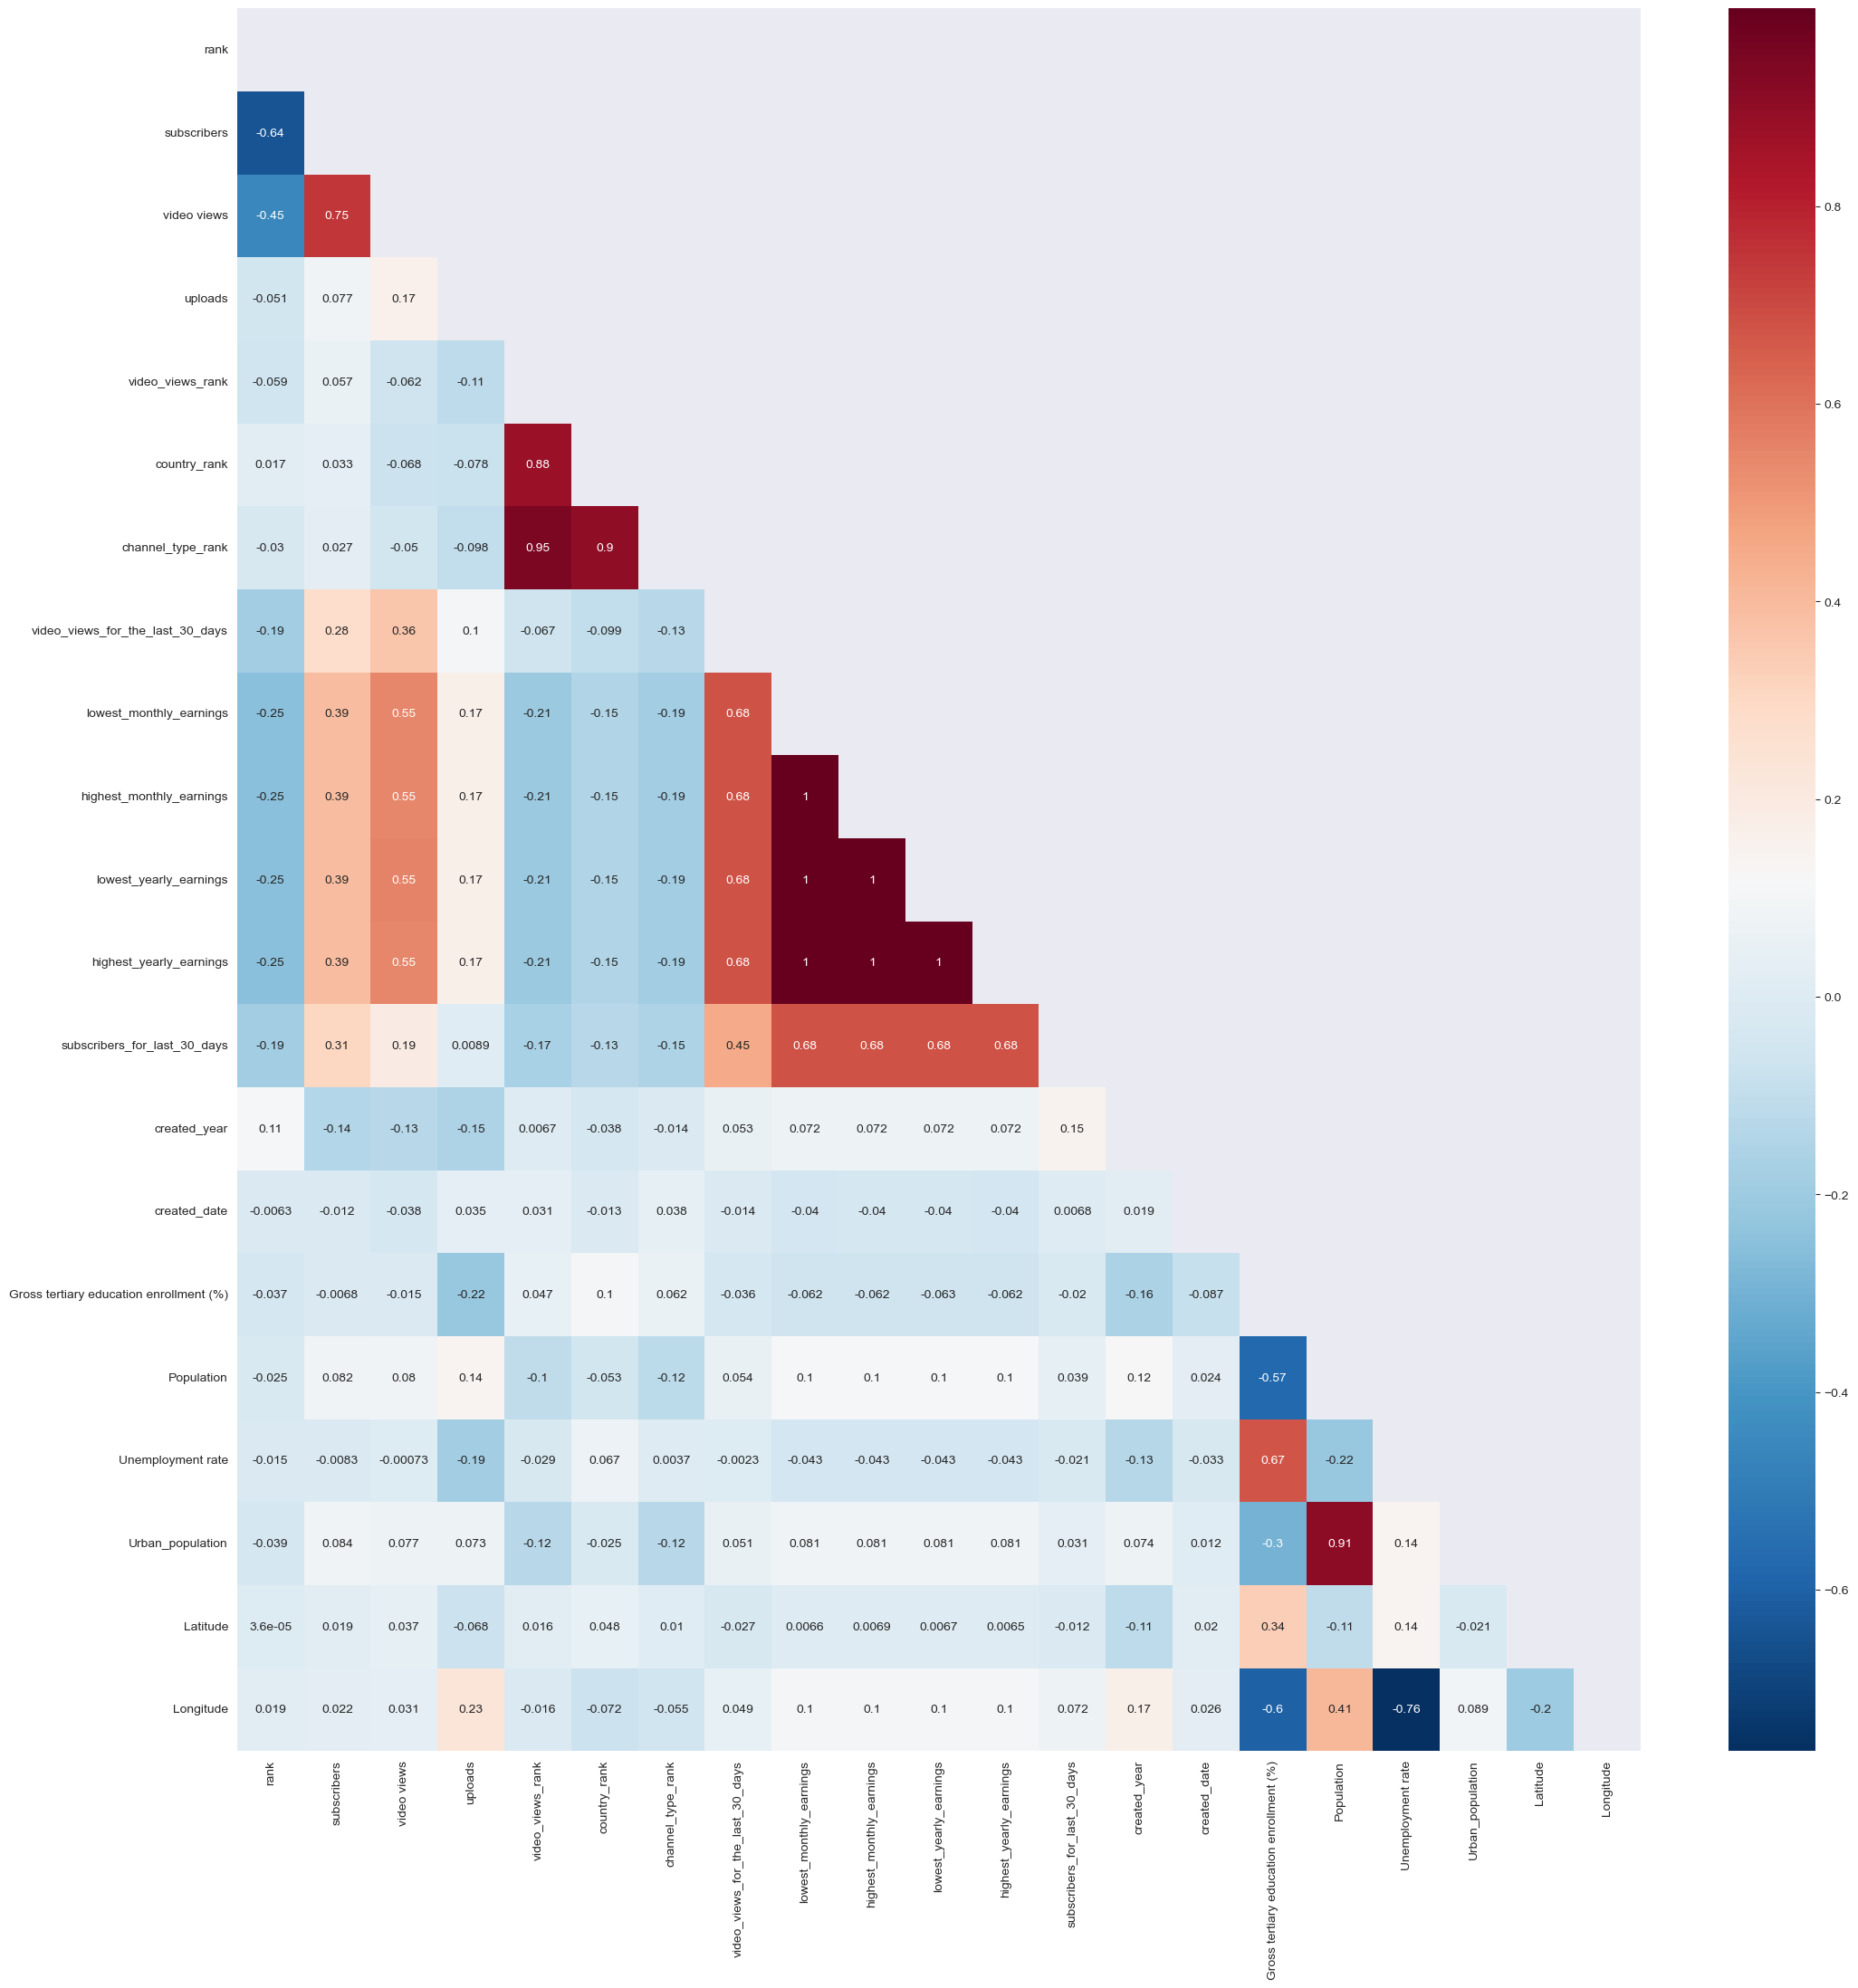

In [16]:
plt.figure(figsize=(25,25))
corr=data_num.corr()
mask_corr = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap=plt.cm.RdBu_r, annot=True, annot_kws={'size':10}, mask = mask_corr)

Text(0.5, 1.0, 'Топ 10 каналов по количеству подписчиков')

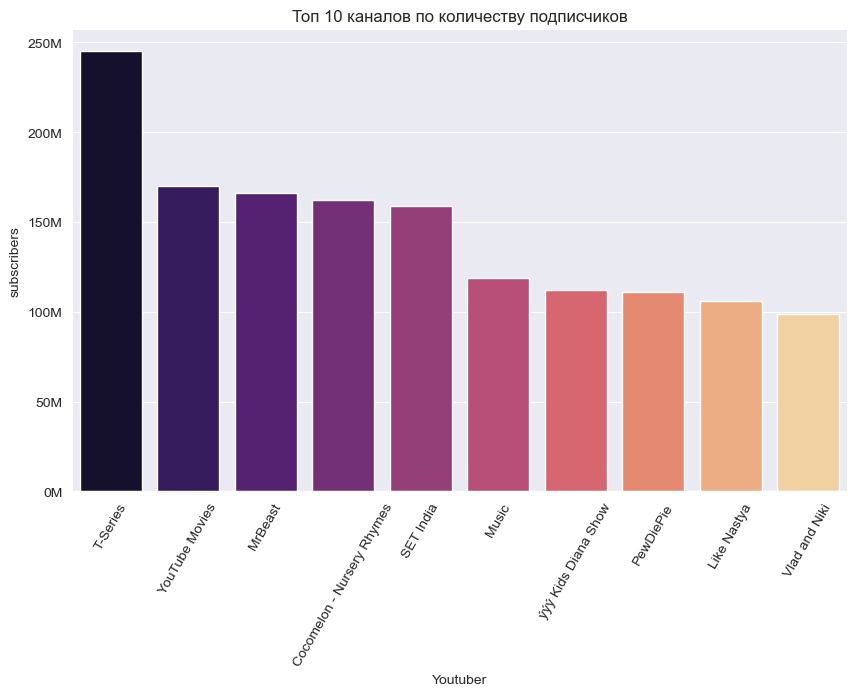

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
ax=sns.barplot(y='subscribers',x='Youtuber',data=data,order=data.sort_values('subscribers',ascending=False).Youtuber.iloc[:10],palette='magma')
plt.xticks(rotation=60)
ax.set_yticklabels([f'{int(label/1e6)}M' for label in ax.get_yticks()])
plt.title('Топ 10 каналов по количеству подписчиков')
